# Get data from API


## Performer-Genre Trends


For the first graph to analyze performer-genre popularity, we want a straightforward undirected graph where:


### Nodes
- **Performer Nodes**
  - `performer_id`: Unique identifier for each performer.
  - `performer_name`: The name of the performer.
  
- **Genre Nodes**
  - `genre_id`: Unique identifier for each genre.
  - `genre_name`: The name of the genre.

### Edges (Relationships)
- **Performer-Genre Relationship**
  - `performer_id`: Links each performer to their associated genre(s).
  - `genre_id`: Links each genre to its associated performer(s).

In [ ]:
import requests
import pandas as pd

# Replace 'YOUR_API_KEY' with your actual Ticketmaster API key
api_key = 'B1887CGuksd5FGGlfb3cybG1ALtsYOQO'
url = 'https://app.ticketmaster.com/discovery/v2/events.json'
params = {
    'apikey': api_key,
    'countryCode': 'ES',  # Filter events to Spain
    'size': 200           # Number of events per request (max is 200)
}

# Initialize empty lists to store extracted data
performers_data = []
genres_data = []
relationships = []

# Make the request to Ticketmaster API
response = requests.get(url, params=params)
data = response.json()

print(data)






{'_embedded': {'events': [{'name': 'Paul McCartney: GOT BACK TOUR', 'type': 'event', 'id': 'Z698xZ2qZa17W', 'test': False, 'url': 'https://www.ticketmaster.es/event/paul-mccartney-got-back-tour-tickets/41277?language=en-us', 'locale': 'en-us', 'images': [{'ratio': '16_9', 'url': 'https://s1.ticketm.net/dam/a/d36/7a1cf601-19aa-4db2-8bf0-f8262d48cd36_RECOMENDATION_16_9.jpg', 'width': 100, 'height': 56, 'fallback': False}, {'ratio': '16_9', 'url': 'https://s1.ticketm.net/dam/a/ac1/3bc6b045-e04f-4520-b1de-b552e2b1cac1_SOURCE', 'width': 2426, 'height': 1365, 'fallback': False}, {'ratio': '16_9', 'url': 'https://s1.ticketm.net/dam/a/d36/7a1cf601-19aa-4db2-8bf0-f8262d48cd36_RETINA_PORTRAIT_16_9.jpg', 'width': 640, 'height': 360, 'fallback': False}, {'url': 'https://s1.ticketm.net/dam/a/d36/7a1cf601-19aa-4db2-8bf0-f8262d48cd36_SOURCE', 'width': 1738, 'height': 2480, 'fallback': False}, {'ratio': '16_9', 'url': 'https://s1.ticketm.net/dam/a/ac1/3bc6b045-e04f-4520-b1de-b552e2b1cac1_TABLET_LANDSC

In [14]:
import json

# Pretty-print the first few lines of the API response
print(json.dumps(data, indent=4)[:2000])  # Adjust the slice for desired length

{
    "_embedded": {
        "events": [
            {
                "name": "Paul McCartney: GOT BACK TOUR",
                "type": "event",
                "id": "Z698xZ2qZa17W",
                "test": false,
                "url": "https://www.ticketmaster.es/event/paul-mccartney-got-back-tour-tickets/41277?language=en-us",
                "locale": "en-us",
                "images": [
                    {
                        "ratio": "16_9",
                        "url": "https://s1.ticketm.net/dam/a/d36/7a1cf601-19aa-4db2-8bf0-f8262d48cd36_RECOMENDATION_16_9.jpg",
                        "width": 100,
                        "height": 56,
                        "fallback": false
                    },
                    {
                        "ratio": "16_9",
                        "url": "https://s1.ticketm.net/dam/a/ac1/3bc6b045-e04f-4520-b1de-b552e2b1cac1_SOURCE",
                        "width": 2426,
                        "height": 1365,
                    

In [16]:
data_no_images = data.copy()

# Remove 'images' key from each event
if "_embedded" in data and "events" in data["_embedded"]:
    for event in data["_embedded"]["events"]:
        event.pop("images", None)

# Pretty-print the cleaned-up response
print(json.dumps(data, indent=4)[:5000])  # Adjust the slice for desired length

{
    "_embedded": {
        "events": [
            {
                "name": "Paul McCartney: GOT BACK TOUR",
                "type": "event",
                "id": "Z698xZ2qZa17W",
                "test": false,
                "url": "https://www.ticketmaster.es/event/paul-mccartney-got-back-tour-tickets/41277?language=en-us",
                "locale": "en-us",
                "sales": {
                    "public": {
                        "startDateTime": "2024-06-21T08:00:00Z",
                        "startTBD": false,
                        "startTBA": false,
                        "endDateTime": "2024-12-09T20:00:00Z"
                    }
                },
                "dates": {
                    "start": {
                        "localDate": "2024-12-09",
                        "localTime": "21:00:00",
                        "dateTime": "2024-12-09T20:00:00Z",
                        "dateTBD": false,
                        "dateTBA": false,
                 

In [17]:
def print_json_structure(data, indent=0):
    """
    Recursively print the structure of a JSON object with its attributes.
    """
    if isinstance(data, dict):
        for key, value in data.items():
            print("  " * indent + f"- {key}: {type(value).__name__}")
            print_json_structure(value, indent + 1)
    elif isinstance(data, list):
        print("  " * indent + f"- List of {len(data)} items:")
        if len(data) > 0:
            print_json_structure(data[0], indent + 1)
    else:
        print("  " * indent + f"- Value: {type(data).__name__}")

# Call the function on your data
print_json_structure(data_no_images)


- _embedded: dict
  - events: list
    - List of 184 items:
      - name: str
        - Value: str
      - type: str
        - Value: str
      - id: str
        - Value: str
      - test: bool
        - Value: bool
      - url: str
        - Value: str
      - locale: str
        - Value: str
      - sales: dict
        - public: dict
          - startDateTime: str
            - Value: str
          - startTBD: bool
            - Value: bool
          - startTBA: bool
            - Value: bool
          - endDateTime: str
            - Value: str
      - dates: dict
        - start: dict
          - localDate: str
            - Value: str
          - localTime: str
            - Value: str
          - dateTime: str
            - Value: str
          - dateTBD: bool
            - Value: bool
          - dateTBA: bool
            - Value: bool
          - timeTBA: bool
            - Value: bool
          - noSpecificTime: bool
            - Value: bool
        - timezone: str
          

In [ ]:
# Check if data contains events
if '_embedded' in data and 'events' in data['_embedded']:
    for event in data['_embedded']['events']:
        # Process each performer and genre for the event
        if 'classifications' in event:
            for classification in event['classifications']:
                # Extract genre information
                genre = classification.get('genre', {}).get('name')
                genre_id = classification.get('genre', {}).get('id')
                
                if genre and genre_id:
                    # Add genre to genres_data if not already present
                    if genre_id not in [g['genre_id'] for g in genres_data]:
                        genres_data.append({'genre_id': genre_id, 'genre_name': genre})
                    
                    # Process performer details
                    if 'attractions' in event['_embedded']:
                        for attraction in event['_embedded']['attractions']:
                            performer_name = attraction.get('name')
                            performer_id = attraction.get('id')
                            
                            if performer_name and performer_id:
                                # Add performer to performers_data if not already present
                                if performer_id not in [p['performer_id'] for p in performers_data]:
                                    performers_data.append({'performer_id': performer_id, 'performer_name': performer_name})
                                
                                # Create relationship between performer and genre
                                relationships.append({'performer_id': performer_id, 'genre_id': genre_id})

# Create DataFrames for each entity
performers_df = pd.DataFrame(performers_data)
genres_df = pd.DataFrame(genres_data)
relationships_df = pd.DataFrame(relationships)

In [ ]:
# Display DataFrames to verify data
performers_df.head()

In [9]:
genres_df.head()

,genre_id,genre_name
0,KnvZfZ7vAeA,Rock
1,KnvZfZ7vAvl,Other
2,KnvZfZ7vAAk,Wrestling
3,KnvZfZ7vAev,Pop
4,KnvZfZ7vAe6,Undefined


In [10]:
relationships_df.head()

,performer_id,genre_id
0,K8vZ9171uq0,KnvZfZ7vAeA
1,K8vZ9171uq0,KnvZfZ7vAeA
2,K8vZ917GSz7,KnvZfZ7vAeA
3,K8vZ917GSz7,KnvZfZ7vAeA
4,K8vZ917GSz7,KnvZfZ7vAeA


In [2]:
# Display the number of rows in each DataFrame
print("Performers DataFrame size:", performers_df.shape[0])
print("Genres DataFrame size:", genres_df.shape[0])
print("Relationships DataFrame size:", relationships_df.shape[0])


Performers DataFrame size: 77
Genres DataFrame size: 11
Relationships DataFrame size: 222


In [3]:
# # Save each DataFrame to a CSV file
performers_df.to_csv('data\performers.csv', index=False)
genres_df.to_csv('data\genres.csv', index=False)
relationships_df.to_csv(r'data\relationships.csv', index=False)


print("DataFrames saved to CSV files:")
print("Performers: performers.csv")
print("Genres: genres.csv")
print("Relationships: relationships.csv")


DataFrames saved to CSV files:
Performers: performers.csv
Genres: genres.csv
Relationships: relationships.csv


<>:2: SyntaxWarning: invalid escape sequence '\p'
<>:3: SyntaxWarning: invalid escape sequence '\g'
<>:2: SyntaxWarning: invalid escape sequence '\p'
<>:3: SyntaxWarning: invalid escape sequence '\g'
C:\Users\Monica\AppData\Local\Temp\ipykernel_10880\1189827163.py:2: SyntaxWarning: invalid escape sequence '\p'
  performers_df.to_csv('data\performers.csv', index=False)
C:\Users\Monica\AppData\Local\Temp\ipykernel_10880\1189827163.py:3: SyntaxWarning: invalid escape sequence '\g'
  genres_df.to_csv('data\genres.csv', index=False)


In [4]:
import networkx as nx
import pandas as pd


# Initialize an undirected graph
G = nx.Graph()

# Add performer nodes
for _, row in performers_df.iterrows():
    G.add_node(row['performer_id'], label=row['performer_name'], type='performer')

# Add genre nodes
for _, row in genres_df.iterrows():
    G.add_node(row['genre_id'], label=row['genre_name'], type='genre')

# Add edges between performers and genres
for _, row in relationships_df.iterrows():
    G.add_edge(row['performer_id'], row['genre_id'])

# Optional: Print basic info about the graph
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())


Number of nodes: 88
Number of edges: 79


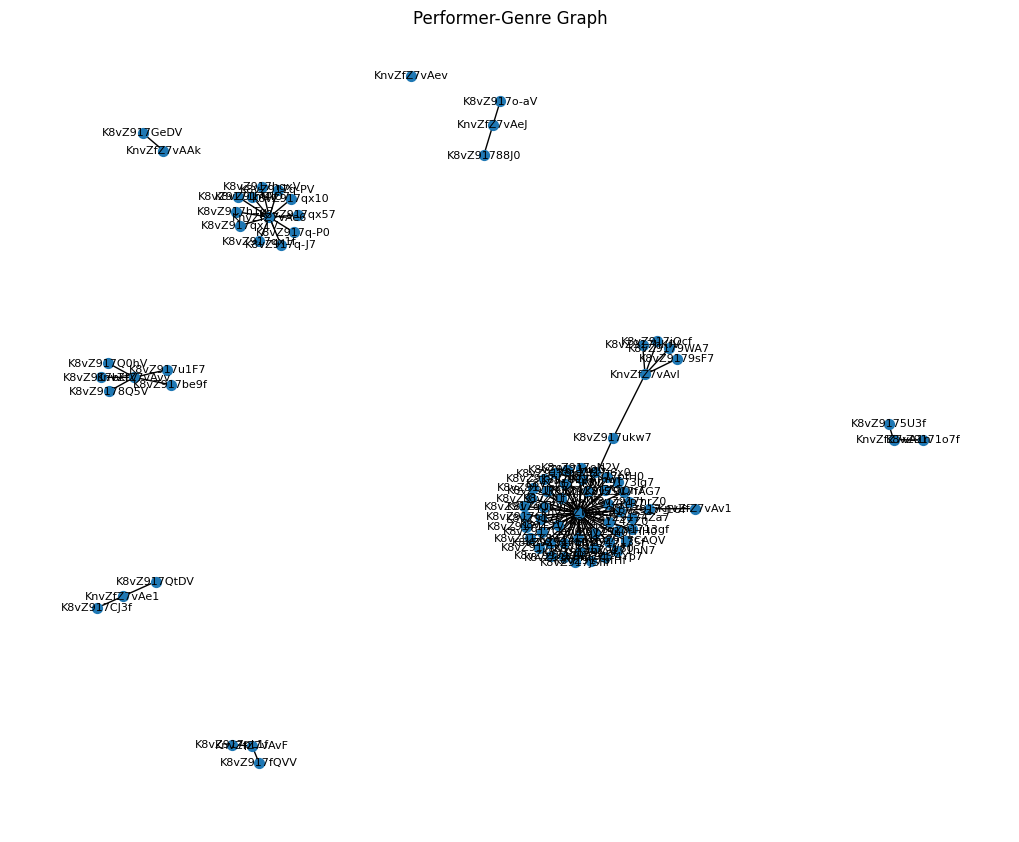

In [5]:
import matplotlib.pyplot as plt

# Draw the graph
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, seed=42)  # Layout for clear visualization
nx.draw(G, pos, with_labels=True, node_size=50, font_size=8)
plt.title("Performer-Genre Graph")
plt.show()


## Interactive graph

In [6]:
import networkx as nx
import pandas as pd
import plotly.graph_objs as go

# Sample DataFrames (replace these with your actual DataFrames)
# performers_df = pd.DataFrame({'performer_id': [...], 'performer_name': [...]})
# genres_df = pd.DataFrame({'genre_id': [...], 'genre_name': [...]})
# relationships_df = pd.DataFrame({'performer_id': [...], 'genre_id': [...]})

# Initialize an undirected graph
G = nx.Graph()

# Add performer nodes with names
for _, row in performers_df.iterrows():
    G.add_node(row['performer_name'], type='performer')

# Add genre nodes with names
for _, row in genres_df.iterrows():
    G.add_node(row['genre_name'], type='genre')

# Add edges using names instead of IDs
for _, row in relationships_df.iterrows():
    performer_name = performers_df.loc[performers_df['performer_id'] == row['performer_id'], 'performer_name'].values[0]
    genre_name = genres_df.loc[genres_df['genre_id'] == row['genre_id'], 'genre_name'].values[0]
    G.add_edge(performer_name, genre_name)

# Create positions for each node for layout
pos = nx.spring_layout(G, seed=42)

# Extract positions and types for Plotly
node_x = []
node_y = []
node_text = []
node_type = []

for node in G.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)
    node_text.append(node)
    node_type.append(G.nodes[node]['type'])

# Edge coordinates
edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.extend([x0, x1, None])
    edge_y.extend([y0, y1, None])

# Create edge trace
edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines'
)

# Create node trace
node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers+text',
    text=node_text,
    hoverinfo='text',
    marker=dict(
        size=10,
        color=['#1f78b4' if t == 'performer' else '#33a02c' for t in node_type],
        line_width=1
    )
)

# Layout and figure
fig = go.Figure(data=[edge_trace, node_trace],
                layout=go.Layout(
                    title="Interactive Performer-Genre Graph",
                    title_x=0.5,
                    showlegend=False,
                    hovermode='closest',
                    margin=dict(b=20, l=20, r=20, t=40),
                    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)
                ))

fig.show()


In [7]:
# Calculate degree centrality for each node in the graph
degree_centrality = nx.degree_centrality(G)

# Convert degree centrality to a DataFrame for easier analysis
centrality_df = pd.DataFrame(list(degree_centrality.items()), columns=['Node', 'Degree Centrality'])
centrality_df.sort_values(by='Degree Centrality', ascending=False, inplace=True)

# Display the degree centrality DataFrame
print("Degree Centrality of Performer-Genre Graph:")
print(centrality_df)



Degree Centrality of Performer-Genre Graph:
             Node  Degree Centrality
77           Rock           0.551724
81      Undefined           0.126437
78          Other           0.057471
83    Alternative           0.057471
87         Family           0.022989
..            ...                ...
75     Jamiroquai           0.011494
73  Lionel Richie           0.011494
72     Stray Kids           0.011494
86    Hip-Hop/Rap           0.011494
80            Pop           0.000000

[88 rows x 2 columns]


For genres, a high degree centrality indicates that the genre is associated with many performers, suggesting it is broadly popular and has widespread appeal.


For performers, a higher degree centrality would mean the performer is connected to multiple genres, showing their versatility or crossover into different genres.

In [8]:
# Calculate degree centrality for each node in the graph
degree_centrality = nx.degree_centrality(G)

# Separate performers and genres based on their type
performer_centrality = {node: centrality for node, centrality in degree_centrality.items() if G.nodes[node]['type'] == 'performer'}
genre_centrality = {node: centrality for node, centrality in degree_centrality.items() if G.nodes[node]['type'] == 'genre'}

# Convert to DataFrames for easier analysis
performer_centrality_df = pd.DataFrame(list(performer_centrality.items()), columns=['Performer', 'Degree Centrality'])
genre_centrality_df = pd.DataFrame(list(genre_centrality.items()), columns=['Genre', 'Degree Centrality'])

# Sort by Degree Centrality
performer_centrality_df.sort_values(by='Degree Centrality', ascending=False, inplace=True)
genre_centrality_df.sort_values(by='Degree Centrality', ascending=False, inplace=True)

# Display the DataFrames
print("Performer Degree Centrality:")
print(performer_centrality_df)
print("\nGenre Degree Centrality:")
print(genre_centrality_df)


Performer Degree Centrality:
            Performer  Degree Centrality
25     Paula Cendejas           0.022989
54  Twenty One Pilots           0.022989
2             Elyanna           0.011494
1     Imagine Dragons           0.011494
0      Paul McCartney           0.011494
..                ...                ...
72         Stray Kids           0.011494
73      Lionel Richie           0.011494
74               Duki           0.011494
75         Jamiroquai           0.011494
76        OneRepublic           0.011494

[77 rows x 2 columns]

Genre Degree Centrality:
               Genre  Degree Centrality
0               Rock           0.551724
4          Undefined           0.126437
1              Other           0.057471
6        Alternative           0.057471
10            Family           0.022989
5          Classical           0.022989
7             Comedy           0.022989
8   Dance/Electronic           0.022989
2          Wrestling           0.011494
9        Hip-Hop/Rap          

### TODO
improve the datset, all those alternative udnfinde other, posibly group them


search for other stuff to add
